In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib

In [160]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/Institut-Zdravotnych-Analyz/covid19-data/main/Hospitals/OpenData_Slovakia_Covid_Hospital_ALL.csv",
    delimiter=";", usecols=["Datum","Kraj","Okres","Nemocnica","KodPZS","Obsadene_covid_lozka","Plucna_vent_lozka","Suspektni_JIS_OAIM","Potvrdeni_JIS_OAIM","hospitalizovany"])


In [163]:
res = df[["Datum", "hospitalizovany"]]

res.to_csv("hospitalizacie.csv", index=False)

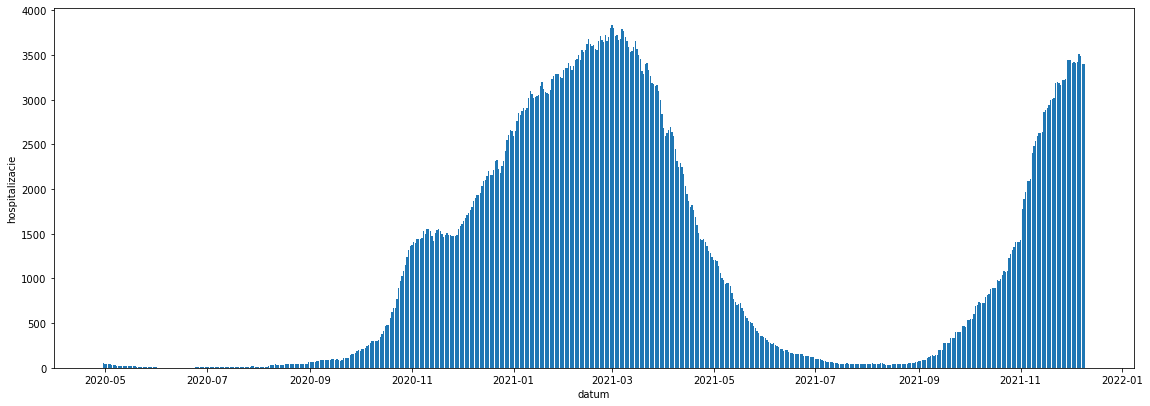

In [164]:
dates = [datetime.strptime(d,"%Y-%m-%d").date() for d in res['Datum']]
hosp = np.array(res["hospitalizovany"])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(dates, hosp)
plt.xlabel("datum")
plt.ylabel("hospitalizacie")
plt.show()

In [165]:
res

,Datum,hospitalizovany
0,2020-04-30,0
1,2020-04-30,0
2,2020-04-30,1
3,2020-04-30,0
4,2020-04-30,0
...,...,...
71769,2021-12-05,3416
71770,2021-12-06,3510
71771,2021-12-07,3491
71772,2021-12-08,3397


In [171]:
modifiedDataFrame = pd.DataFrame(columns=['datum', 'hospitalizovany'])
print(modifiedDataFrame)

Empty DataFrame
Columns: [datum, hospitalizovany]
Index: []


In [203]:
datum = None
hosp = 0
for i in range(len(res)):
    if datum == None:
        datum = res.loc[i, "Datum"]
    if datum != res.loc[i, "Datum"]:
        modifiedDataFrame = modifiedDataFrame.append({'datum': datum, 'hospitalizovany': hosp}, ignore_index=True)
        datum = res.loc[i, "Datum"]
        hosp = 0
    hosp += res.loc[i, "hospitalizovany"]
    if i == len(res)-1:
        modifiedDataFrame = modifiedDataFrame.append({'datum': datum, 'hospitalizovany': hosp}, ignore_index=True)

In [204]:
modifiedDataFrame

,datum,hospitalizovany
0,2020-04-30,51
1,2020-05-01,43
2,2020-05-02,41
3,2020-05-03,42
4,2020-05-04,38
...,...,...
9415,2021-12-05,3416
9416,2021-12-06,3510
9417,2021-12-07,3491
9418,2021-12-08,3397
